In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Set the correct path to your CSIC dataset
file_path = "csic_final.csv"  # Update with actual path

# Load the dataset
df = pd.read_csv(file_path)



In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61065 entries, 0 to 61064
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            61065 non-null  object 
 1   Method           61065 non-null  object 
 2   URI              61065 non-null  object 
 3   Host-Header      61065 non-null  object 
 4   Host             61065 non-null  object 
 5   Connection       61065 non-null  object 
 6   Accept           61065 non-null  object 
 7   Accept-Charset   61065 non-null  object 
 8   Accept-Language  61065 non-null  object 
 9   Cache-control    61065 non-null  object 
 10  Cookie           61065 non-null  object 
 11  Pragma           61065 non-null  object 
 12  User-Agent       61065 non-null  object 
 13  Content-Length   17977 non-null  float64
 14  Content-Type     17977 non-null  object 
 15  POST-Data        17977 non-null  object 
 16  GET-Query        17609 non-null  object 
dtypes: float64(1

,Class,Method,URI,Host-Header,Host,Connection,Accept,Accept-Charset,Accept-Language,Cache-control,Cookie,Pragma,User-Agent,Content-Length,Content-Type,POST-Data,GET-Query
0,Valid,GET,/tienda1/index.jsp,HTTP/1.1,localhost:8080,close,"text/xml,application/xml,application/xhtml+xml...","utf-8, utf-8;q=0.5, *;q=0.5",en,no-cache,JSESSIONID=EA414B3E327DED6875848530C864BD8F,no-cache,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,NaN,NaN,NaN,NaN
1,Valid,GET,/tienda1/publico/anadir.jsp,HTTP/1.1,localhost:8080,close,"text/xml,application/xml,application/xhtml+xml...","utf-8, utf-8;q=0.5, *;q=0.5",en,no-cache,JSESSIONID=54E25FF4B7F0E4E855B112F882E9EEA5,no-cache,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,NaN,NaN,NaN,id=1&nombre=Jam%F3n+Ib%E9rico&precio=39&cantid...
2,Valid,POST,/tienda1/publico/anadir.jsp,HTTP/1.1,localhost:8080,close,"text/xml,application/xml,application/xhtml+xml...","utf-8, utf-8;q=0.5, *;q=0.5",en,no-cache,JSESSIONID=788887A0F479749C4CEEA1E268B4A501,no-cache,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,74.0,application/x-www-form-urlencoded,id=1&nombre=Jam%F3n+Ib%E9rico&precio=39&cantid...,NaN
3,Valid,GET,/tienda1/publico/autenticar.jsp,HTTP/1.1,localhost:8080,close,"text/xml,application/xml,application/xhtml+xml...","utf-8, utf-8;q=0.5, *;q=0.5",en,no-cache,JSESSIONID=94ECD5EE8EF7EFE4BB26C701B150ED7B,no-cache,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,NaN,NaN,NaN,modo=entrar&login=caria&pwd=egipciaca&remember...
4,Valid,POST,/tienda1/publico/autenticar.jsp,HTTP/1.1,localhost:8080,close,"text/xml,application/xml,application/xhtml+xml...","utf-8, utf-8;q=0.5, *;q=0.5",en,no-cache,JSESSIONID=23391DBBADEC19FE01E02D201F278C6A,no-cache,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,60.0,application/x-www-form-urlencoded,modo=entrar&login=caria&pwd=egipciaca&remember...,NaN


In [ ]:
# Check attack vs. normal request distribution
print(df['Class'].value_counts())
# Count GET vs. POST requests
print(df['Method'].value_counts())


Class
Valid        36000
Anomalous    25065
Name: count, dtype: int64
Method
GET     43088
POST    17580
PUT       397
Name: count, dtype: int64


In [ ]:
# Drop irrelevant columns
columns_to_drop = ['Method','Host-Header', 'Host', 'Connection', 'Cache-control','Cookie', 'Pragma', 'User-Agent', 'Accept', 'Accept-Charset', 'Accept-Language','Content-Length','Content-Type']

df_cleaned = df.drop(columns=columns_to_drop)

# Display remaining columns
print("Remaining columns:", df_cleaned.columns)


Remaining columns: Index(['Class', 'URI', 'POST-Data', 'GET-Query'], dtype='object')


In [ ]:
# Fill missing GET-Query and POST-Data with empty strings
df_cleaned['POST-Data'].fillna("", inplace=True)
df_cleaned['GET-Query'].fillna("", inplace=True)

# Verify missing values are handled
print(df_cleaned.isnull().sum())


Class        0
URI          0
POST-Data    0
GET-Query    0
dtype: int64


<ipython-input-7-8e40fd936658>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['POST-Data'].fillna("", inplace=True)
<ipython-input-7-8e40fd936658>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

Since SQLi and XSS attacks often involve long inputs, analyzing request lengths is crucial. We'll compute

URI length – Length of the requested resource path

GET-Query length – Length of query parameters in the URL

POST-Data length – Length of user-submitted form data



In [ ]:
# Compute length features
df_cleaned['URI_Length'] = df_cleaned['URI'].apply(len)
df_cleaned['GET_Length'] = df_cleaned['GET-Query'].apply(len)
df_cleaned['POST_Length'] = df_cleaned['POST-Data'].apply(len)

# Display summary statistics
print(df_cleaned[['URI_Length', 'GET_Length', 'POST_Length']].describe())


         URI_Length    GET_Length   POST_Length
count  61065.000000  61065.000000  61065.000000
mean      28.695014     31.360124     31.955048
std        5.633944     75.175814     75.701675
min        1.000000      0.000000      0.000000
25%       27.000000      0.000000      0.000000
50%       27.000000      0.000000      0.000000
75%       31.000000     17.000000     17.000000
max       66.000000    836.000000    836.000000


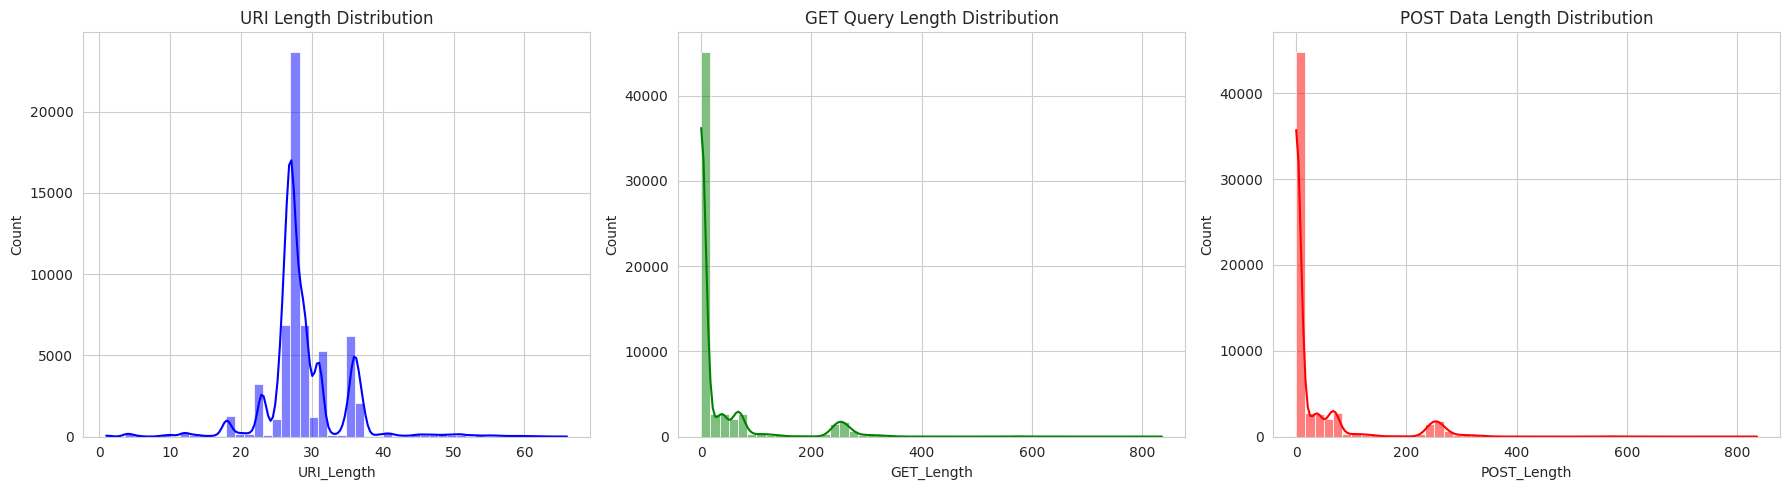

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")

# Create subplots for better visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot distributions
sns.histplot(df_cleaned['URI_Length'], bins=50, kde=True, ax=axes[0], color="blue")
axes[0].set_title("URI Length Distribution")

sns.histplot(df_cleaned['GET_Length'], bins=50, kde=True, ax=axes[1], color="green")
axes[1].set_title("GET Query Length Distribution")

sns.histplot(df_cleaned['POST_Length'], bins=50, kde=True, ax=axes[2], color="red")
axes[2].set_title("POST Data Length Distribution")

# Show plots
plt.tight_layout()
plt.show()


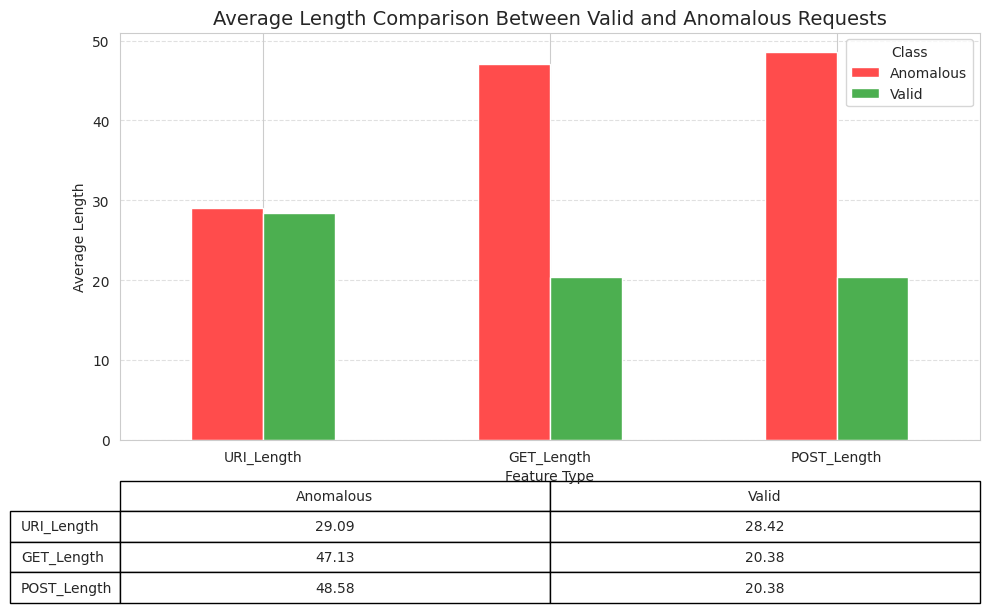

In [ ]:
# Assuming you already have this in your previous code
df_cleaned['URI_Length'] = df_cleaned['URI'].apply(len)
df_cleaned['GET_Length'] = df_cleaned['GET-Query'].apply(len)
df_cleaned['POST_Length'] = df_cleaned['POST-Data'].apply(len)

# Labeling the data
grouped = df_cleaned.groupby('Class')[['URI_Length', 'GET_Length', 'POST_Length']].mean()

# Convert to a table-friendly format
grouped_rounded = grouped.round(2).transpose()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart
grouped_rounded.plot(kind='bar', ax=ax, rot=0, color=['#ff4c4c', '#4caf50'])

# Title and labels
plt.title('Average Length Comparison Between Valid and Anomalous Requests', fontsize=14)
plt.ylabel('Average Length')
plt.xlabel('Feature Type')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add table underneath
cell_text = []
for row in grouped_rounded.values:
    cell_text.append(['{:.2f}'.format(x) for x in row])

table = plt.table(cellText=cell_text,
                  rowLabels=grouped_rounded.index,
                  colLabels=grouped_rounded.columns,
                  cellLoc='center',
                  loc='bottom',
                  bbox=[0.0, -0.4, 1.0, 0.3])  # Adjust position

plt.subplots_adjust(bottom=0.3)  # Adjust space for table
plt.tight_layout()
plt.show()

# **Entropy-Based Feature for SQLi/XSS Detection**

## **1️⃣ Understanding Entropy**
Entropy measures the **randomness** or **unpredictability** of data. A **higher entropy value** indicates more **chaotic data**, while a **lower entropy value** suggests a predictable pattern.

### **Why is entropy important for security?**
- Normal web requests have a **structured pattern** with predictable elements.
- **SQL injection (SQLi) and XSS payloads** contain **random symbols, encoded text, and obfuscation techniques** (e.g., `%27`, `&#x3C;`, `UNION ALL SELECT`).
- **Attack payloads tend to have higher entropy** than valid requests.

---


### **Simple Explanation:**
- **Low entropy** → More predictable, e.g., `aaaaaa`.
- **High entropy** → More unpredictable, e.g., `a@!2%g5*`.

---

## **3️⃣ Using Entropy in ML Model**
- **Compute entropy** for `URI`, `GET-Query`, and `POST-Data`.
- **Higher entropy values** → Likely an attack.
- **Lower entropy values** → Likely a valid request.
- Use **entropy as a numerical feature** for ML classification.

### **Example: Entropy Calculation**
✅ **Normal Request:** `/home/index.html`
- Few unique characters, structured format.
- **Low entropy (≈ 2.5-3.0).**

❌ **XSS Payload:** `<script>alert('XSS')</script>`
- Many unique characters, unpredictable structure.
- **High entropy (≈ 4.5-5.0).**

---



In [ ]:
def shannon_entropy(text):
    """Calculate Shannon entropy of a given text."""
    if not text:  # Handle empty strings
        return 0
    prob_dist = np.array([text.count(char) / len(text) for char in set(text)])
    return -np.sum(prob_dist * np.log2(prob_dist))

In [ ]:
df_cleaned['URI_Entropy'] = df_cleaned['URI'].apply(shannon_entropy)
df_cleaned['GET_Entropy'] = df_cleaned['GET-Query'].apply(shannon_entropy)
df_cleaned['POST_Entropy'] = df_cleaned['POST-Data'].apply(shannon_entropy)


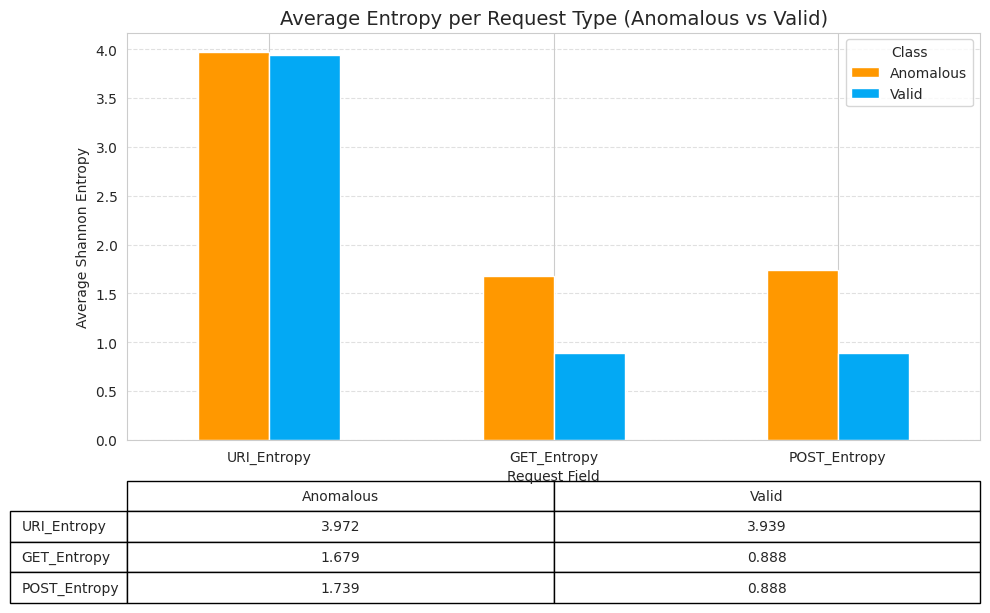

In [ ]:
# --- Step 3: Group and Compute Mean Entropy per Class ---
entropy_means = df_cleaned.groupby('Class')[['URI_Entropy', 'GET_Entropy', 'POST_Entropy']].mean()
entropy_means_rounded = entropy_means.round(3).transpose()

# --- Step 4: Bar Chart + Table Visualization ---
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#ff9800', '#03a9f4']  # Anomalous, Valid

# Plot bar chart
entropy_means_rounded.plot(kind='bar', ax=ax, rot=0, color=colors)

# Labels and title
plt.title('Average Entropy per Request Type (Anomalous vs Valid)', fontsize=14)
plt.ylabel('Average Shannon Entropy')
plt.xlabel('Request Field')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Table below the chart
cell_text = []
for row in entropy_means_rounded.values:
    cell_text.append(['{:.3f}'.format(x) for x in row])

table = plt.table(cellText=cell_text,
                  rowLabels=entropy_means_rounded.index,
                  colLabels=entropy_means_rounded.columns,
                  cellLoc='center',
                  loc='bottom',
                  bbox=[0.0, -0.4, 1.0, 0.3])

plt.subplots_adjust(bottom=0.3)
plt.tight_layout()
plt.show()

In [ ]:
from collections import Counter
import re

# Combine text from all relevant fields (URI, GET, POST)
anomalous_text = df_cleaned[df_cleaned["Class"] == "Anomalous"][["URI", "GET-Query", "POST-Data"]].astype(str).apply(" ".join, axis=1)

# Tokenization - Splitting words & removing special characters
tokens = [re.sub(r"[^a-zA-Z0-9_<>=]", "", word.lower()) for text in anomalous_text for word in text.split()]

# Count frequency of words
word_counts = Counter(tokens)

# Display most common attack-related words
print(word_counts.most_common(50))


[('tienda1publicoanadirjsp', 2826), ('tienda1publicoautenticarjsp', 2789), ('tienda1publicoregistrojsp', 2788), ('tienda1miembroseditarjsp', 2780), ('tienda1publicopagarjsp', 2730), ('tienda1publicocaracteristicasjsp', 1967), ('tienda1publicovaciarjsp', 1888), ('tienda1publicoentrarjsp', 1837), ('b2a=vaciarcarrito', 902), ('errormsga=credencialesincorrectas', 888), ('ida=1', 458), ('ida=2', 444), ('tienda1asflogowidegif', 102), ('asflogowidegif', 87), ('tienda1old', 84), ('old', 81), ('tienda1inc', 72), ('bak', 71), ('', 70), ('tienda1bak', 67), ('inc', 66), ('tienda16909030637832563290jsp', 54), ('tienda1asflogowide', 48), ('b2=vaciarcarrito', 46), ('asflogowide', 44), ('tienda14861362529278789730', 43), ('id=1', 42), ('errormsg=credencialesincorrectas', 41), ('4861362529278789730', 41), ('6909030637832563290jsp', 38), ('tienda1publicoold', 33), ('tienda1asflogowidegifold', 27), ('tienda1publicoasflogowidegif', 26), ('id=127injected_param', 26), ('tienda1', 25), ('id=27293bwaitfordela

In [ ]:
!pip install wordcloud


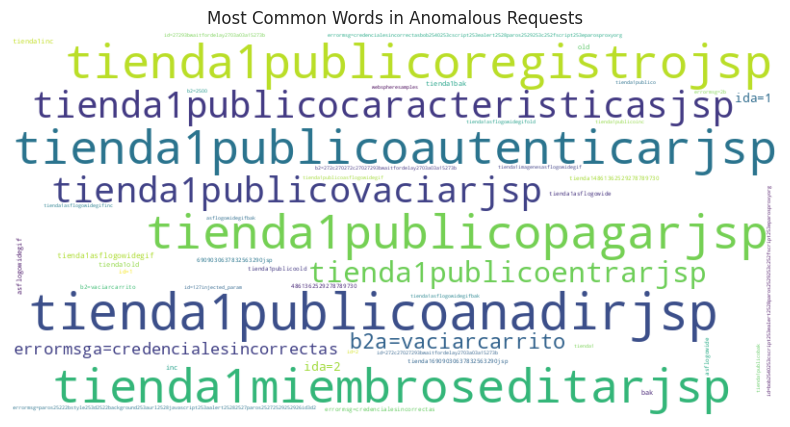

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert word frequency dictionary to a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Most Common Words in Anomalous Requests")
plt.show()


1. Frequent words like tienda1publico, pagar, anadir, editar suggest these URLs belong to a Spanish-language web application.
2. Words like autenticar, registro, caracteristicas indicate authentication, registration, and feature pages. These could be high-risk endpoints for SQL injection and XSS attacks.
3. Certain query parameters (e.g., ida=1, b2a=vaciarcarrito) might indicate attempted parameter-based attacks.

In [ ]:
from collections import Counter
import re

# Function to tokenize words from a column
def extract_words(series):
    words = []
    for text in series.dropna():
        words.extend(re.findall(r'\w+', text.lower()))  # Extract words (alphanumeric only)
    return Counter(words)

# Extract word counts for Anomalous and Valid requests
anomalous_words = extract_words(df_cleaned[df_cleaned['Class'] == 'Anomalous']['GET-Query']) + \
                  extract_words(df_cleaned[df_cleaned['Class'] == 'Anomalous']['POST-Data'])

valid_words = extract_words(df_cleaned[df_cleaned['Class'] == 'Valid']['GET-Query']) + \
              extract_words(df_cleaned[df_cleaned['Class'] == 'Valid']['POST-Data'])

# Find words unique to Anomalous requests
bad_word_list = set(anomalous_words.keys()) - set(valid_words.keys())

print(f"Identified {len(bad_word_list)} unique 'bad' words.")

# Function to count bad words in a given text
def count_bad_words(text):
    if pd.isna(text):
        return 0
    words = re.findall(r'\w+', text.lower())
    return sum(1 for word in words if word in bad_word_list)

# Apply the function to both GET-Query and POST-Data
df_cleaned['Bad_Word_Count'] = df_cleaned['GET-Query'].apply(count_bad_words) + \
                               df_cleaned['POST-Data'].apply(count_bad_words)

# Display statistics
print(df_cleaned[['Class', 'Bad_Word_Count']].groupby('Class').describe())


Identified 9920 unique 'bad' words.
          Bad_Word_Count                                               
                   count      mean       std  min  25%  50%  75%    max
Class                                                                  
Anomalous        25065.0  4.323399  9.572327  0.0  0.0  1.0  7.0  119.0
Valid            36000.0  0.000000  0.000000  0.0  0.0  0.0  0.0    0.0


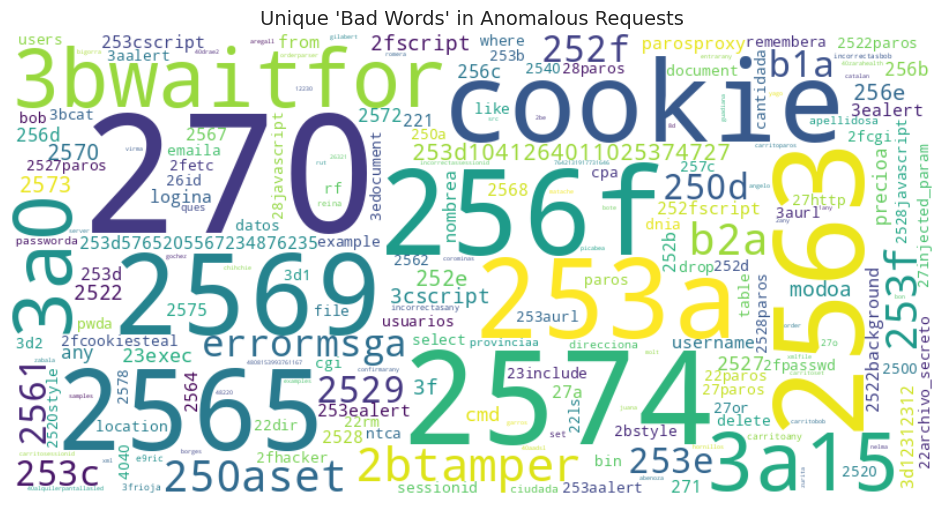

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word frequencies only for anomalous unique words
bad_word_freq = {word: anomalous_words[word] for word in bad_word_list}

# Create a WordCloud object
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(bad_word_freq)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Unique 'Bad Words' in Anomalous Requests", fontsize=14)
plt.show()


New Feature Exploration ***Numeric-to-Text Ratio***

 Why Consider It?


Injection attacks often contain many numbers (ID references, encoded payloads, hex codes).
Example:
Normal Query: profile.php?name=john → Low Ratio
Suspicious Query: id=12345&value=0x5a7 → High Ratio

If the ratio is unusually high, the request may contain encoded or obfuscated payloads.

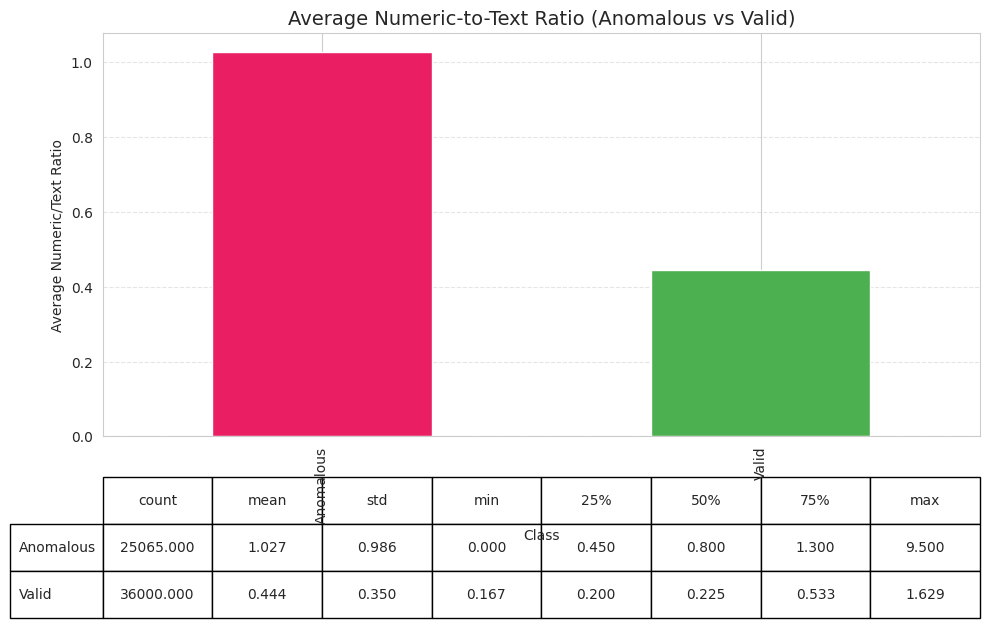

In [ ]:
import re
# Function to calculate numeric-to-text ratio
def numeric_to_text_ratio(text):
    if pd.isna(text):
        return 0  # Return 0 if no data

    digits = len(re.findall(r'\d', text))  # Count digits
    words = len(re.findall(r'\w+', text))  # Count words

    return digits / (words + 1)  # Adding 1 to avoid zero division

# Apply to URI, GET, and POST data
df_cleaned['Numeric_Text_Ratio'] = df_cleaned['URI'].apply(numeric_to_text_ratio) + \
                                   df_cleaned['GET-Query'].apply(numeric_to_text_ratio) + \
                                   df_cleaned['POST-Data'].apply(numeric_to_text_ratio)

# --- Step 3: Group stats ---
grouped_stats = df_cleaned.groupby('Class')['Numeric_Text_Ratio'].describe().round(3)
mean_values = grouped_stats['mean']

# --- Step 4: Plotting ---
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for mean ratios
mean_values.plot(kind='bar', color=['#e91e63', '#4caf50'], ax=ax)

# Titles and labels
plt.title('Average Numeric-to-Text Ratio (Anomalous vs Valid)', fontsize=14)
plt.ylabel('Average Numeric/Text Ratio')
plt.xlabel('Class')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Table below the chart
cell_text = []
for i in grouped_stats.columns:
    cell_text.append(grouped_stats[i].values)

table = plt.table(cellText=list(map(lambda row: ['{:.3f}'.format(val) for val in row], zip(*cell_text))),
                  rowLabels=grouped_stats.index,
                  colLabels=grouped_stats.columns,
                  cellLoc='center',
                  loc='bottom',
                  bbox=[0.0, -0.45, 1.0, 0.35])

plt.subplots_adjust(bottom=0.35)
plt.tight_layout()
plt.show()


In [ ]:
# Define special characters to track
special_chars = ["'", '"', "{", "}", "[", "]", "--", ";", "/", "\\", "=", "<", ">"]

# Function to count total occurrences of special characters in a text
def count_total_special_chars(text):
    if pd.isna(text):
        return 0
    return sum(text.count(char) for char in special_chars)

In [ ]:
# Apply the function to GET-Query, POST-Data, and URI columns
df_cleaned['Special_Char_Count'] = (
    df_cleaned['GET-Query'].apply(count_total_special_chars) +
    df_cleaned['POST-Data'].apply(count_total_special_chars) +
    df_cleaned['URI'].apply(count_total_special_chars)
)


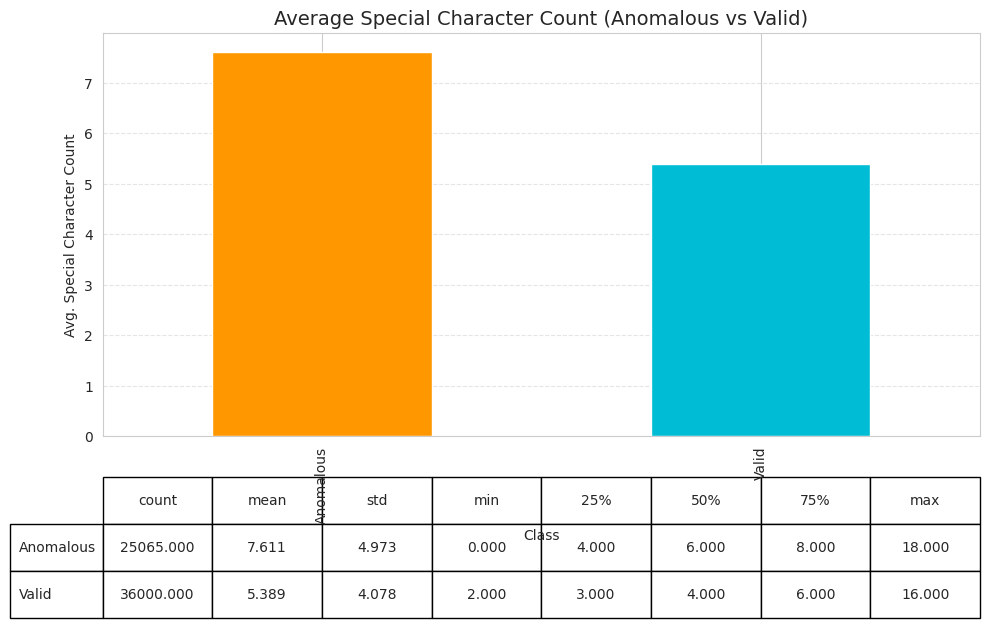

In [ ]:
# Step 1: Grouped statistics
special_char_stats = df_cleaned.groupby('Class')['Special_Char_Count'].describe().round(3)
mean_specials = special_char_stats['mean']

# Step 2: Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart
mean_specials.plot(kind='bar', color=['#ff9800', '#00bcd4'], ax=ax)

# Titles and labels
plt.title('Average Special Character Count (Anomalous vs Valid)', fontsize=14)
plt.ylabel('Avg. Special Character Count')
plt.xlabel('Class')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Step 3: Table below the chart
cell_text = []
for i in special_char_stats.columns:
    cell_text.append(special_char_stats[i].values)

table = plt.table(cellText=list(map(lambda row: ['{:.3f}'.format(val) for val in row], zip(*cell_text))),
                  rowLabels=special_char_stats.index,
                  colLabels=special_char_stats.columns,
                  cellLoc='center',
                  loc='bottom',
                  bbox=[0.0, -0.45, 1.0, 0.35])

plt.subplots_adjust(bottom=0.35)
plt.tight_layout()
plt.show()

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61065 entries, 0 to 61064
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Class               61065 non-null  object 
 1   URI                 61065 non-null  object 
 2   POST-Data           61065 non-null  object 
 3   GET-Query           61065 non-null  object 
 4   URI_Length          61065 non-null  int64  
 5   GET_Length          61065 non-null  int64  
 6   POST_Length         61065 non-null  int64  
 7   URI_Entropy         61065 non-null  float64
 8   GET_Entropy         61065 non-null  float64
 9   POST_Entropy        61065 non-null  float64
 10  Bad_Word_Count      61065 non-null  int64  
 11  Numeric_Text_Ratio  61065 non-null  float64
 12  Special_Char_Count  61065 non-null  int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 6.1+ MB


**final features for training will be:**

1️⃣ URI_Length
2️⃣ GET_Length
3️⃣ POST_Length
4️⃣ URI_Entropy
5️⃣ GET_Entropy
6️⃣ POST_Entropy
7️⃣ Numeric_Text_Ratio
8️⃣ Special_Char_Count

In [ ]:
# Define the path to save the file
save_path = "update with actual path"

# Drop the 'Bad_Word_Count' column
df_final = df_cleaned.drop(columns=['Bad_Word_Count'])

# Save the final dataset
df_final.to_csv(save_path, index=False)

print(f"Final dataset saved at: {save_path}")

Final dataset saved at: /content/drive/My Drive/Hybrid-WAF/final_dataset.csv
